In [3]:
import pandas as pd

In [49]:
import numpy as np

#1.	Load the data from auto.csv and store in appropriate variable in Python environment.

In [51]:
file_path = ("E:\College\SEM 3\Analytics\Saikat\Auto.csv")
auto_df = pd.read_csv(file_path)
print(auto_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\user\AppData\Local\Temp\ipykernel_19156\341015472.py:1: SyntaxWarning: invalid escape sequence '\C'
  file_path = ("E:\College\SEM 3\Analytics\Saikat\Auto.csv")


In [9]:
#2. Remove the missing values from the dataset.

auto_df_cleaned = auto_df.dropna()

In [11]:
print(auto_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None


In [53]:
auto_df_cleaned['horsepower'] = auto_df_cleaned['horsepower'].replace('?', np.nan)
auto_df_cleaned['horsepower'] = pd.to_numeric(auto_df_cleaned['horsepower'])
auto_df_cleaned = auto_df_cleaned.dropna(subset=['horsepower'])
print(auto_df_cleaned['horsepower'].dtype)
print(auto_df_cleaned.info())

float64
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


In [15]:
#3.	Identify the quantitative, and the qualitative variables in the dataset.

quantitative_vars = auto_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
qualitative_vars = auto_df_cleaned.select_dtypes(include=['object']).columns

print("Quantitative Variables:", quantitative_vars)
print("Qualitative Variables:", qualitative_vars)


Quantitative Variables: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')
Qualitative Variables: Index(['name'], dtype='object')


In [17]:
#4.	Print the range of values under each quantitative variable

range_quantitative = auto_df_cleaned[quantitative_vars].apply(lambda x: (x.min(), x.max()))
print("Range of Quantitative Variables:\n", range_quantitative)

Range of Quantitative Variables:
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0   9.0          3          68.0        46.0    1613           8.0    70   
1  46.6          8         455.0       230.0    5140          24.8    82   

   origin  
0       1  
1       3  


In [19]:
#5.	Print the mean and standard deviation of each variable.

mean_values = auto_df_cleaned[quantitative_vars].mean()
std_values = auto_df_cleaned[quantitative_vars].std()
print("Mean of Quantitative Variables:\n", mean_values)
print("Standard Deviation of Quantitative Variables:\n", std_values)


Mean of Quantitative Variables:
 mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64
Standard Deviation of Quantitative Variables:
 mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
origin            0.805518
dtype: float64


In [27]:
#6.	Remove the observations from 10th to 85th rows and the range, mean, and standard deviation of each numerical variable in the subset of the data that remains

subset_auto_df = auto_df_cleaned.drop(auto_df_cleaned.index[10:85])


subset_range = subset_auto_df[quantitative_vars].apply(lambda x: (x.min(), x.max()))
subset_mean = subset_auto_df[quantitative_vars].mean()
subset_std = subset_auto_df[quantitative_vars].std()

print("Range of Subset:\n", subset_range)
print("Mean of Subset:\n", subset_mean)
print("Standard Deviation of Subset:\n", subset_std)

Range of Subset:
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  11.0          3          68.0        46.0    1649           8.5    70   
1  46.6          8         455.0       230.0    4997          24.8    82   

   origin  
0       1  
1       3  
Mean of Subset:
 mpg               24.374763
cylinders          5.381703
displacement     187.880126
horsepower       101.003155
weight          2938.854890
acceleration      15.704101
year              77.123028
origin             1.599369
dtype: float64
Standard Deviation of Subset:
 mpg               7.872565
cylinders         1.658135
displacement    100.169973
horsepower       36.003208
weight          811.640668
acceleration      2.719913
year              3.127158
origin            0.819308
dtype: float64


In [25]:
#7. Using the full dataset, explore the value under each column graphically

import matplotlib.pyplot as plt

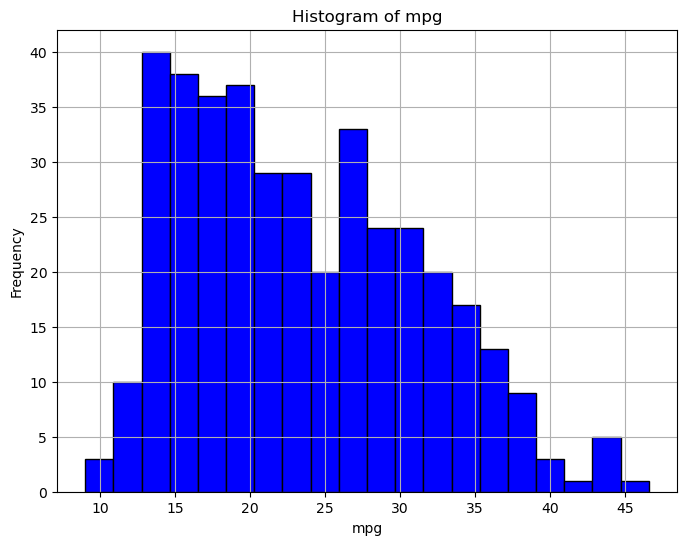

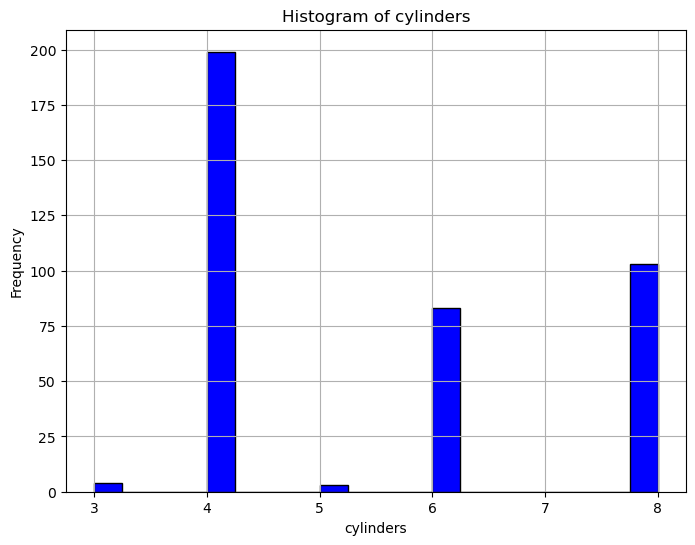

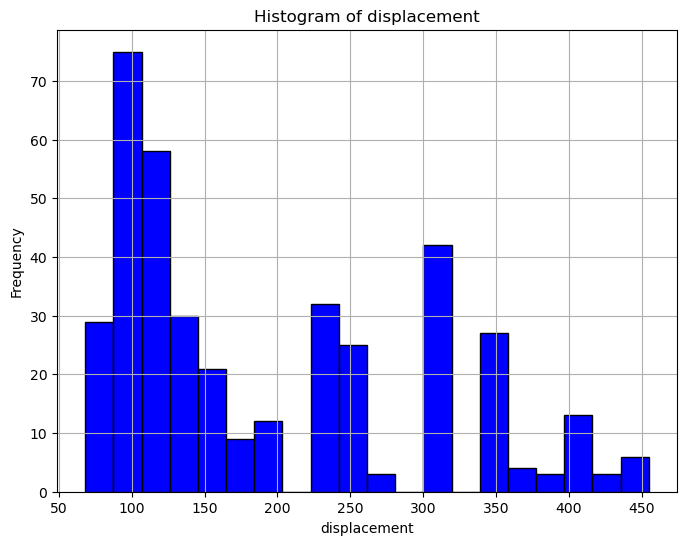

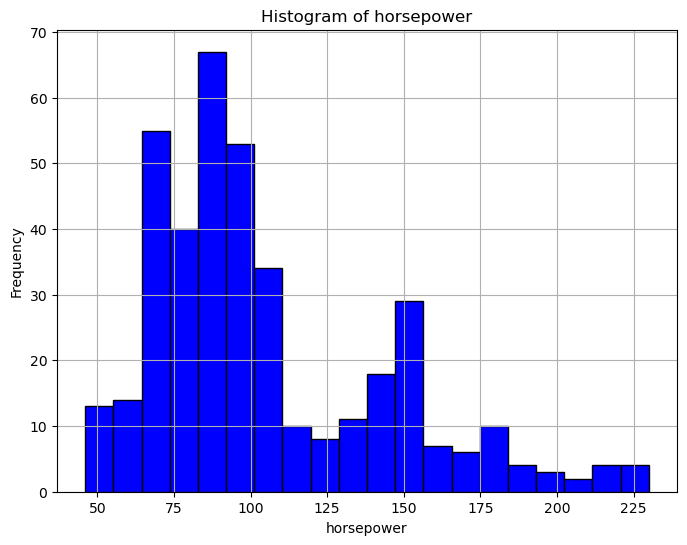

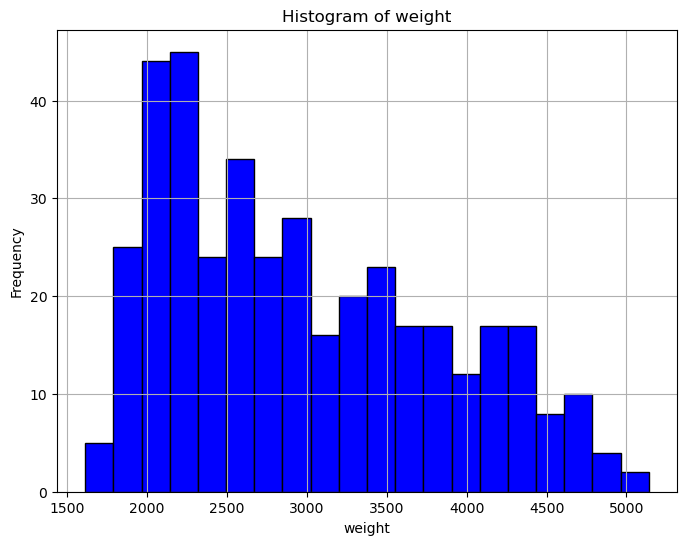

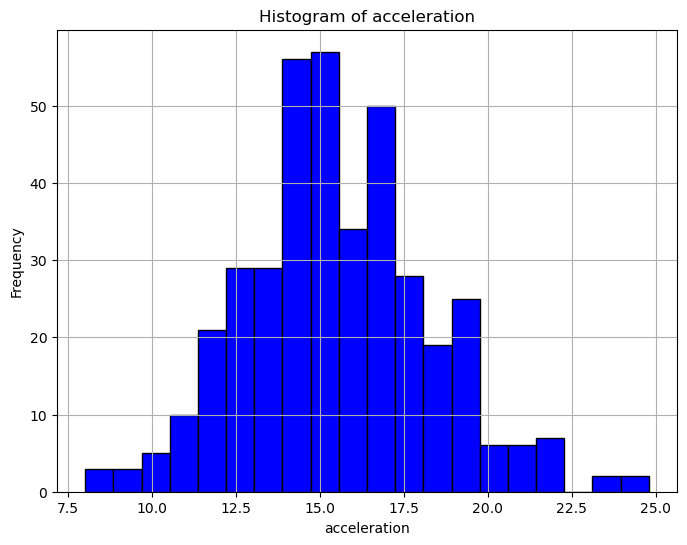

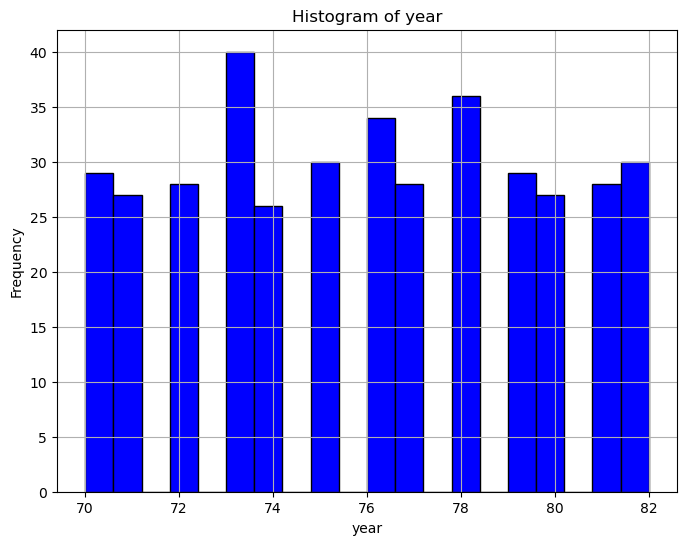

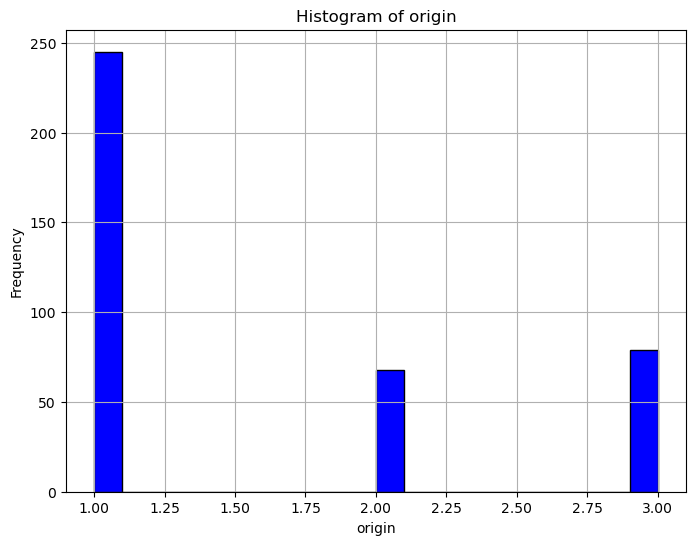

In [55]:
for var in quantitative_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(auto_df_cleaned[var], bins=20, color='blue' , edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

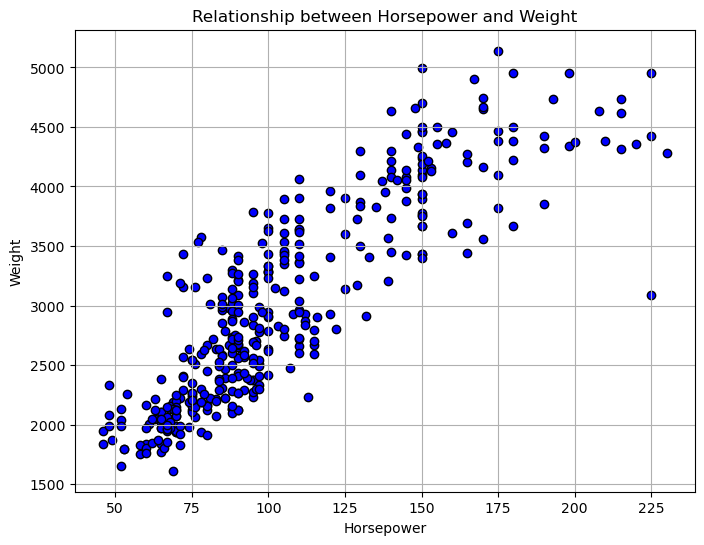

In [31]:
#8. Explore relationships between variables

plt.figure(figsize=(8, 6))
plt.scatter(auto_df_cleaned['horsepower'], auto_df_cleaned['weight'], color='blue', edgecolor='black')
plt.title('Relationship between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.grid(True)
plt.show()


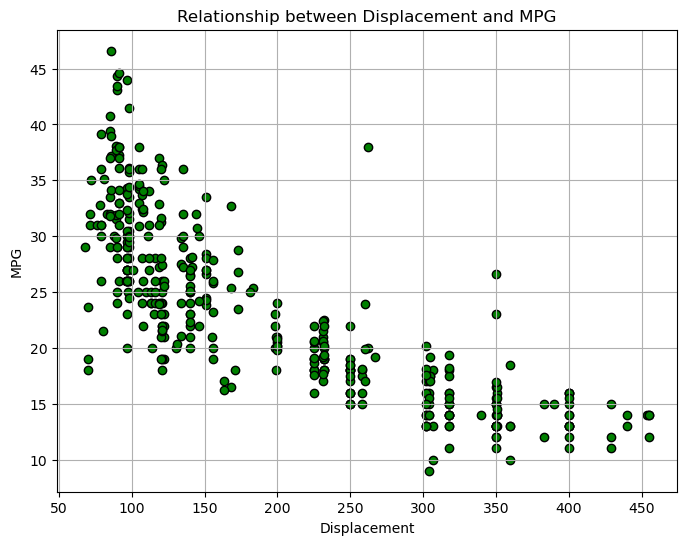

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(auto_df_cleaned['displacement'], auto_df_cleaned['mpg'], color='green', edgecolor='black')
plt.title('Relationship between Displacement and MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

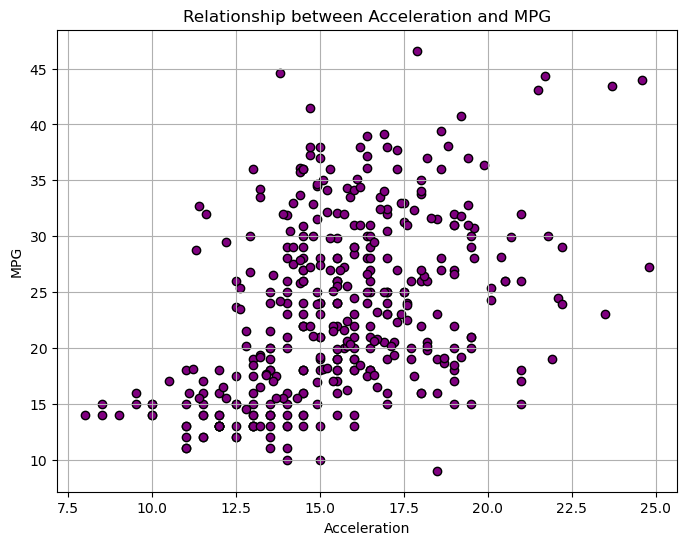

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(auto_df_cleaned['acceleration'], auto_df_cleaned['mpg'], color='purple', edgecolor='black')
plt.title('Relationship between Acceleration and MPG')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


In [41]:
corr_matrix = auto_df_cleaned[quantitative_vars].corr()

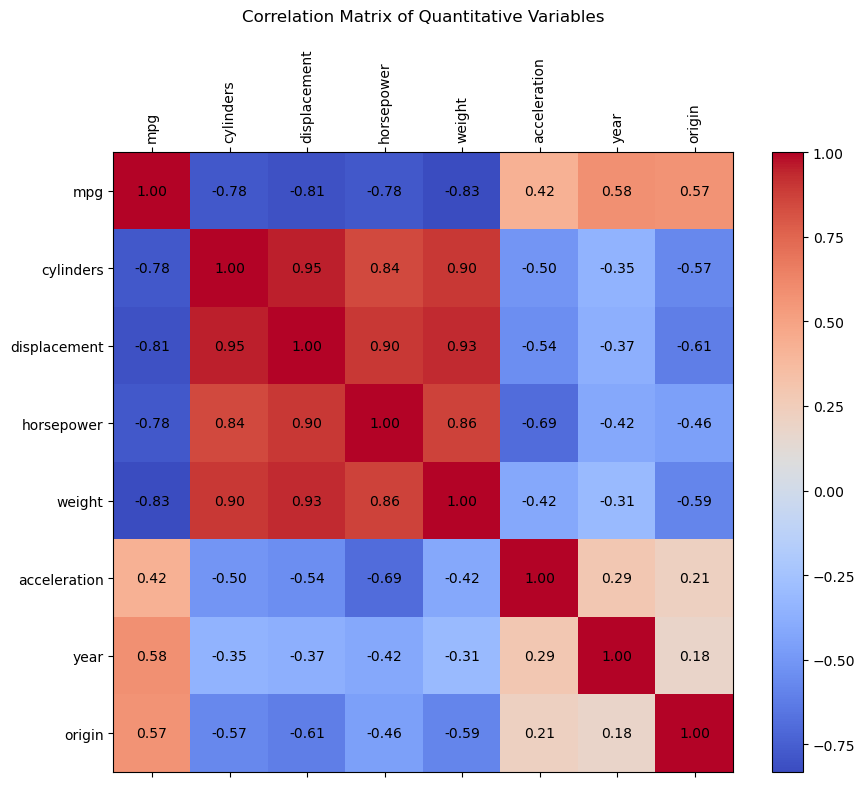

In [47]:
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Quantitative Variables', pad=20)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

# Findings and Interpretation
Histograms of Quantitative Variables:

The histograms provide insight into the distribution of each quantitative variable.
For example:
mpg shows a right-skewed distribution, indicating that most cars have higher fuel efficiency.
weight shows a fairly normal distribution, though slightly skewed to the right.
year shows a more uniform distribution since this represents model years across a fixed range.

Bar Plot of Origin:

The bar plot of origin shows that most cars in the dataset are from origin (1), followed by a smaller number from origin (2) and  (3).
Correlation Heatmap:

The heatmap reveals strong positive correlations between displacement, weight, and cylinders. This makes sense, as larger engines (higher displacement) are often heavier and come with more cylinders.
There is a negative correlation between mpg and variables like displacement, weight, and cylinders, indicating that heavier, larger engine cars tend to have lower fuel efficiency.
Scatter Plot Between Displacement and MPG:

The scatter plot shows a clear negative relationship between displacement and mpg: cars with larger engine displacements tend to have lower fuel efficiency.